In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracao dos dados

In [13]:
df = pd.read_csv('..\data\data_challenge_alura_telecom.csv', sep=',')

In [15]:
df.shape

(7043, 31)

In [19]:
df.head()

,Churn,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,...,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,0,9,65.6,593.30,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1
1,0,0,9,59.9,542.40,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,4,73.9,280.85,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,1,1,13,98.0,1237.85,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
4,1,1,3,83.9,267.40,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [20]:
df.columns


Index(['Churn', 'SeniorCitizen', 'tenure', 'Charges_Monthly', 'Charges_Total',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No_internet_service', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_service', 'StreamingMovies_Yes',
       'Contract_One_year', 'Contract_Two_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Churn                                 7043 non-null   int64  
 1   SeniorCitizen                         7043 non-null   int64  
 2   tenure                                7043 non-null   int64  
 3   Charges_Monthly                       7043 non-null   float64
 4   Charges_Total                         7043 non-null   float64
 5   gender_Male                           7043 non-null   int64  
 6   Partner_Yes                           7043 non-null   int64  
 7   Dependents_Yes                        7043 non-null   int64  
 8   PhoneService_Yes                      7043 non-null   int64  
 9   MultipleLines_No_phone_service        7043 non-null   int64  
 10  MultipleLines_Yes                     7043 non-null   int64  
 11  InternetService_F

# Analises iniciais

In [22]:
# Contagem de cada classe
churn_counts = df['Churn'].value_counts()
churn_counts


Churn
0    5174
1    1869
Name: count, dtype: int64

In [23]:
# Proporção em %
churn_proportion = df['Churn'].value_counts(normalize=True) * 100
churn_proportion


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

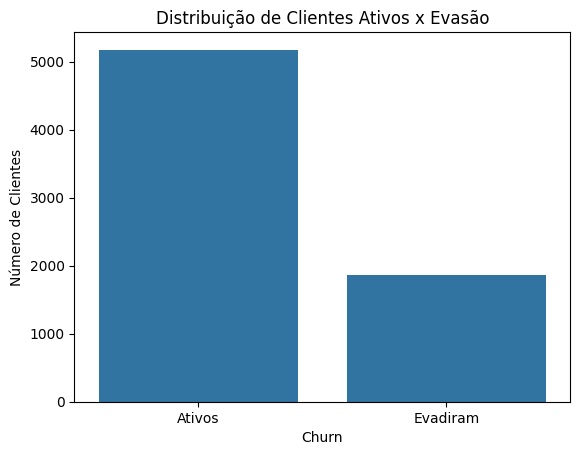

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Clientes Ativos x Evasão')
plt.xticks([0, 1], ['Ativos', 'Evadiram'])
plt.ylabel('Número de Clientes')
plt.show()


# Separacao dos dados

In [31]:
# Target
y = df['Churn']

# Features (removendo a coluna target)
X = df.drop('Churn', axis=1)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [33]:
print("Proporção no treino:")
print(y_train.value_counts(normalize=True) * 100)

print("\nProporção no teste:")
print(y_test.value_counts(normalize=True) * 100)


Proporção no treino:
Churn
0    73.46856
1    26.53144
Name: proportion, dtype: float64

Proporção no teste:
Churn
0    73.450071
1    26.549929
Name: proportion, dtype: float64


# Balanceamento

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [35]:
X_train.shape

(4930, 30)

In [36]:
X_res.shape

(7244, 30)

# Normalizacao


In [37]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['tenure', 'Charges_Monthly', 'Charges_Total']
scaler = StandardScaler()

# Padronização aplicada após SMOTE
X_res[numerical_cols] = scaler.fit_transform(X_res[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



In [38]:
X_res.head()

,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,MultipleLines_Yes,...,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,-0.561837,0.290043,-0.422202,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,-0.937748,0.064810,-0.775554,1,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,1
2,0,0.315289,0.246393,0.247041,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1.275951,0.627019,1.308864,1,1,0,1,0,1,...,0,1,0,1,0,1,1,0,1,0
4,0,-1.063052,-0.647555,-0.882319,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# Analise de Correlacao
Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

In [39]:
numerical_cols = ['tenure', 'Charges_Monthly', 'Charges_Total']
numerical_cols_with_target = numerical_cols + ['Churn']
corr_matrix = df[numerical_cols_with_target].corr()


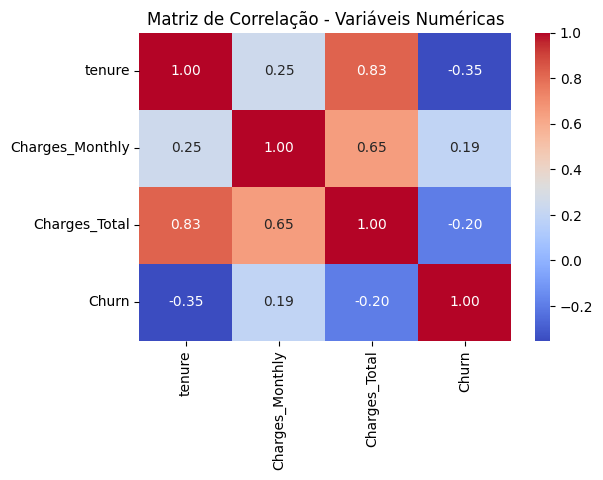

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()


# Analises DIrecionadas


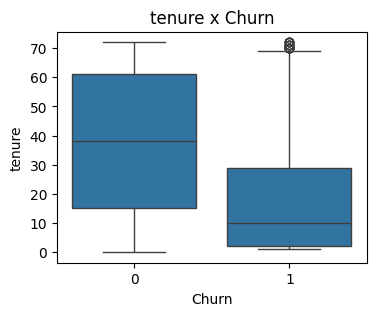

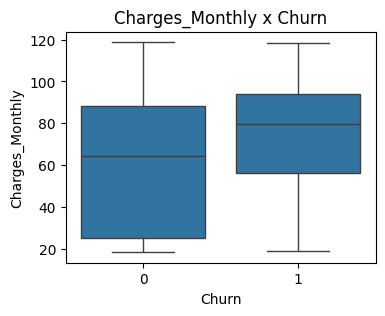

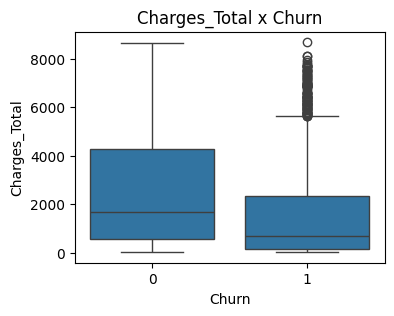

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

numericas = ['tenure', 'Charges_Monthly', 'Charges_Total']

for col in numericas:
    plt.figure(figsize=(4,3))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} x Churn')
    plt.show()


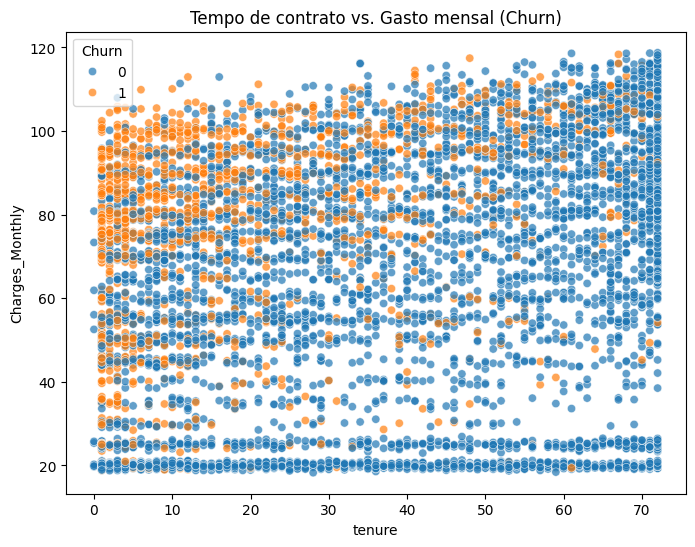

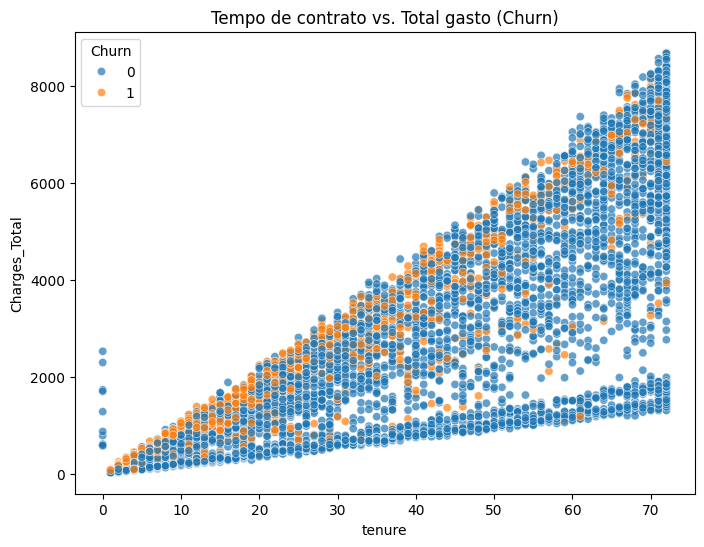

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='Charges_Monthly', hue='Churn', data=df, alpha=0.7)
plt.title('Tempo de contrato vs. Gasto mensal (Churn)')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='Charges_Total', hue='Churn', data=df, alpha=0.7)
plt.title('Tempo de contrato vs. Total gasto (Churn)')
plt.show()


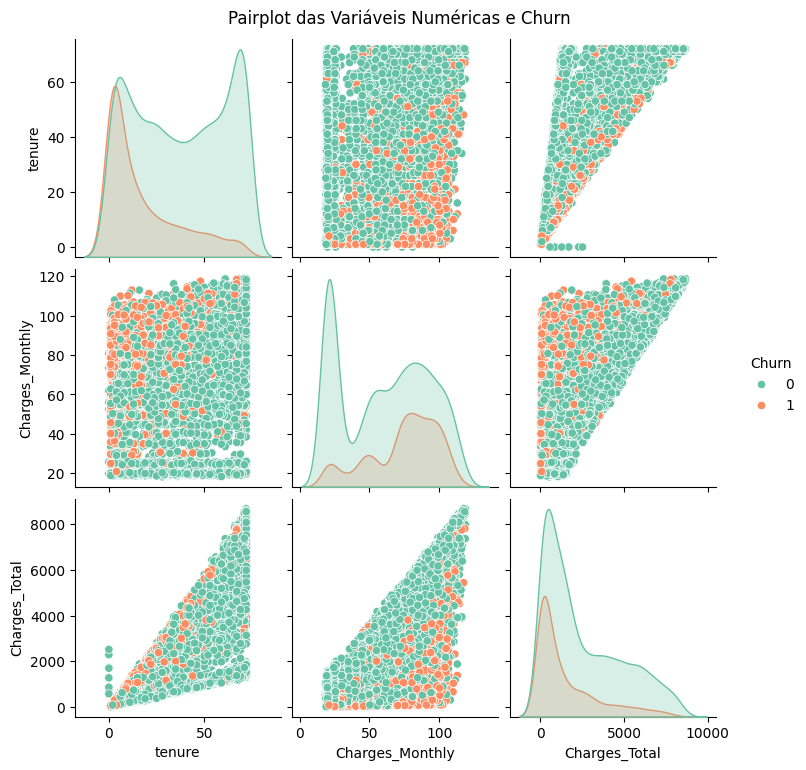

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas colunas numéricas + target
cols_pairplot = ["tenure", "Charges_Monthly", "Charges_Total", "Churn"]

# Criando o pairplot
sns.pairplot(df[cols_pairplot], hue="Churn", diag_kind="kde", palette="Set2")

plt.suptitle("Pairplot das Variáveis Numéricas e Churn", y=1.02)
plt.show()


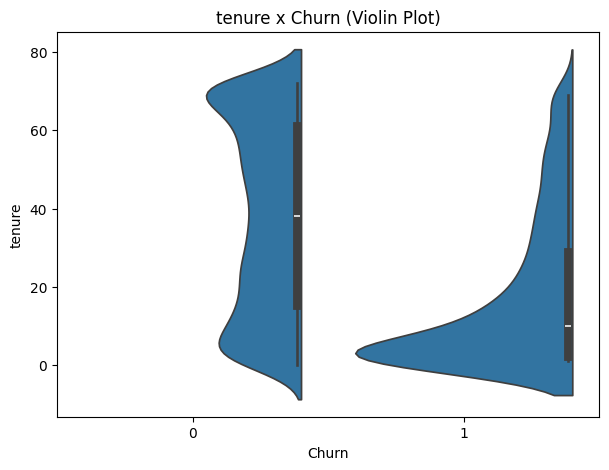

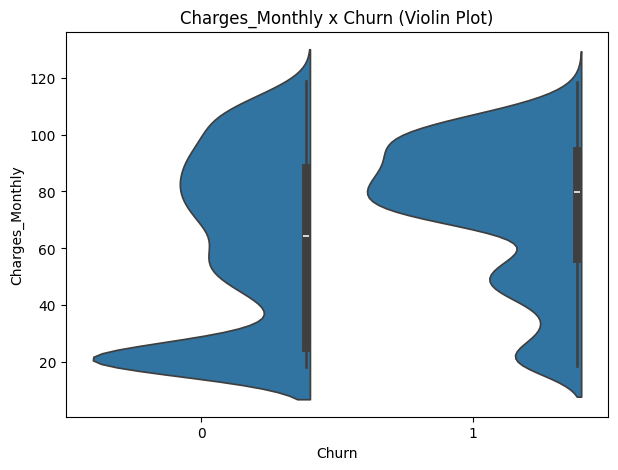

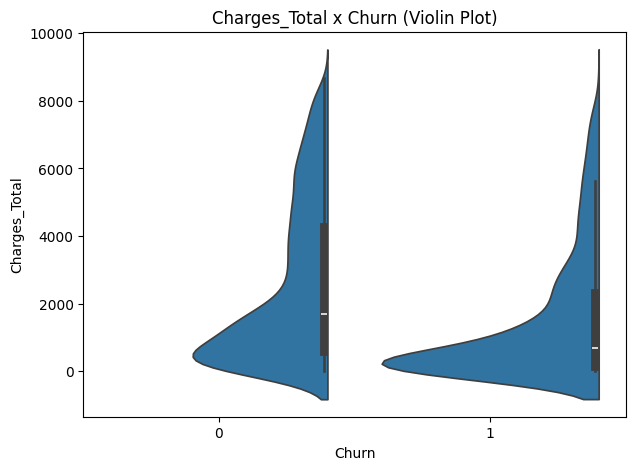

In [48]:
for col in numericas:
    plt.figure(figsize=(7,5))
    sns.violinplot(x='Churn', y=col, data=df, split=True)
    plt.title(f'{col} x Churn (Violin Plot)')
    plt.show()


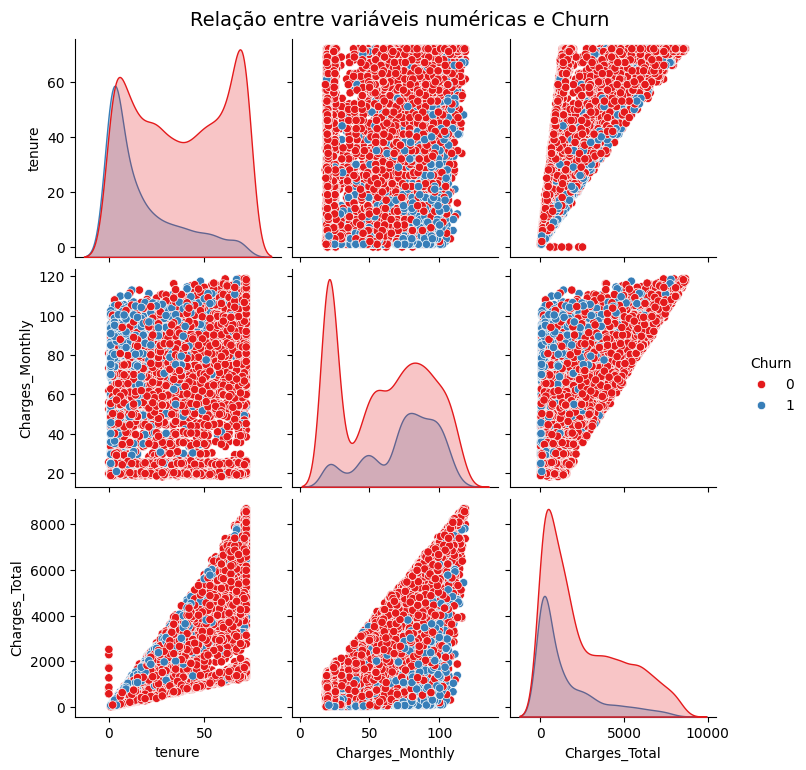

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar colunas numéricas contínuas + alvo
cols_pairplot = ["tenure", "Charges_Monthly", "Charges_Total", "Churn"]

# Criar o pairplot
sns.pairplot(df[cols_pairplot], hue="Churn", diag_kind="kde", palette="Set1")

plt.suptitle("Relação entre variáveis numéricas e Churn", y=1.02, fontsize=14)
plt.show()


# MODELAGEM PREDITIVA

## Criacao de Modelos


In [56]:
X_res

,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,MultipleLines_Yes,...,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,-0.561837,0.290043,-0.422202,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,-0.937748,0.064810,-0.775554,1,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,1
2,0,0.315289,0.246393,0.247041,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1.275951,0.627019,1.308864,1,1,0,1,0,1,...,0,1,0,1,0,1,1,0,1,0
4,0,-1.063052,-0.647555,-0.882319,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,1,-0.520069,1.005557,-0.233241,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
7240,1,0.064681,0.790893,0.285864,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
7241,0,0.983575,1.135088,1.409562,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
7242,0,-0.352998,0.705094,-0.121979,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0


## Regrassao Logistica e RandomFOrestClassifier

In [57]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -----------------
# Modelo 1: Regressão Logística
# -----------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_res, y_res)
y_pred_log = log_reg.predict(X_test)

print("==== Regressão Logística ====")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

# -----------------
# Modelo 2: Random Forest
# -----------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test)

print("\n==== Random Forest ====")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


==== Regressão Logística ====
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1552
           1       0.54      0.68      0.60       561

    accuracy                           0.76      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.78      0.76      0.77      2113

ROC AUC: 0.8238785673594649

==== Random Forest ====
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1552
           1       0.56      0.60      0.58       561

    accuracy                           0.77      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.77      0.77      0.77      2113

ROC AUC: 0.817379564290571


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Treinando o KNN
knn = KNeighborsClassifier(n_neighbors=5)  # você pode ajustar o número de vizinhos
knn.fit(X_res, y_res)

# Previsões
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:,1]

# Avaliação
print("==== KNN ====")
print(classification_report(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))


==== KNN ====
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1552
           1       0.47      0.65      0.55       561

    accuracy                           0.72      2113
   macro avg       0.66      0.70      0.67      2113
weighted avg       0.75      0.72      0.73      2113

ROC AUC: 0.7650062250767223


In [61]:
import pandas as pd

# Resultados que você forneceu
results = {
    "Modelo": ["Regressão Logística", "Random Forest", "KNN"],
    "Accuracy": [0.76, 0.77, 0.72],
    "F1_Churn": [0.60, 0.58, 0.55],
    "ROC_AUC": [0.824, 0.817, 0.765]
}

df_results = pd.DataFrame(results)
df_results


,Modelo,Accuracy,F1_Churn,ROC_AUC
0,Regressão Logística,0.76,0.60,0.824
1,Random Forest,0.77,0.58,0.817
2,KNN,0.72,0.55,0.765


1. Regressão Logística

Escolha do modelo:

Simples, interpretável e muito utilizado para problemas de classificação binária, como churn (0 = permanece, 1 = cancela).

Permite entender a influência de cada variável na probabilidade de churn.

Normalização:

Necessária, porque o modelo otimiza uma função logística baseada em distância implícita e gradiente. Variáveis com magnitudes muito diferentes podem distorcer os coeficientes, prejudicando o aprendizado.

Quando usar:

Ideal quando queremos interpretabilidade e insights estratégicos, além de performance aceitável.

2. Random Forest

Escolha do modelo:

Modelo baseado em árvores, robusto e não paramétrico.

Capaz de capturar relações não lineares e interações complexas entre variáveis.

Tende a lidar bem com dados desbalanceados (apesar de ainda ser beneficiado pelo SMOTE).

Normalização:

Não necessária, porque árvores de decisão usam divisões por valor e não distância. A escala dos dados não altera a performance.

Quando usar:

Ideal quando buscamos alta acurácia e robustez, mesmo com dados heterogêneos.

3. KNN (K-Nearest Neighbors)

Escolha do modelo:

Baseado em distância: classifica um ponto com base nos vizinhos mais próximos.

Fácil de implementar, mas sensível à distribuição e escala das variáveis.

Normalização:

Essencial, pois diferenças de magnitude entre variáveis (por exemplo, Charges_Total vs tenure) afetam diretamente a distância euclidiana, podendo fazer o modelo ignorar variáveis importantes.

Quando usar:

Útil para capturar padrões locais e relações simples de proximidade, mas menos interpretável e sensível a desbalanceamento — por isso usamos SMOTE.

In [62]:
import pandas as pd

# Dados de métricas dos modelos
metrics_data = {
    'Modelo': ['Regressão Logística', 'Random Forest', 'KNN'],
    'Accuracy': [0.76, 0.77, 0.72],
    'Precision_Churn1': [0.54, 0.56, 0.47],
    'Recall_Churn1': [0.68, 0.60, 0.65],
    'F1_Churn1': [0.60, 0.58, 0.55],
    'ROC_AUC': [0.824, 0.817, 0.765]
}

# Criando o DataFrame
df_metrics = pd.DataFrame(metrics_data)

df_metrics


,Modelo,Accuracy,Precision_Churn1,Recall_Churn1,F1_Churn1,ROC_AUC
0,Regressão Logística,0.76,0.54,0.68,0.60,0.824
1,Random Forest,0.77,0.56,0.60,0.58,0.817
2,KNN,0.72,0.47,0.65,0.55,0.765


## Análise crítica

Acurácia

Random Forest > Regressão Logística > KNN

Mas acurácia pode enganar em datasets desbalanceados; o foco deve ser a classe minoritária (churn).

Precisão, Recall e F1-score (classe churn)

Regressão Logística: Recall mais alto (0.68), captura mais clientes que vão churnar.

Random Forest: Precision um pouco melhor (0.56), mas recall menor (0.60).

KNN: Performance geral mais baixa (F1=0.55), menos confiável na classe minoritária.

ROC AUC

Regressão Logística 0.824 > Random Forest 0.817 > KNN 0.765

Indica que Regressão Logística consegue separar melhor as classes.

3️⃣ Overfitting e Underfitting

Random Forest:

Pode ter um pouco de overfitting se muitos parâmetros são complexos (muitas árvores e profundidade alta), mas neste caso, os valores de teste estão próximos da acurácia do treino, indicando bom balanceamento.

KNN:

Parece underfitting: F1 baixo, ROC AUC apenas 0.765. Possível causa: n_neighbors=5 pode ser grande ou pequenas diferenças nas features.

Ajustes: testar diferentes valores de n_neighbors, ou usar pesos por distância (weights='distance').

Regressão Logística:

Performance consistente. Recall alto indica que está capturando bem a classe minoritária sem exagero (overfitting).

4️⃣ Conclusão

Melhor modelo: Regressão Logística, devido ao melhor ROC AUC e recall da classe minoritária.

Random Forest: ligeiramente maior acurácia, mas recall menor.

KNN: menos confiável para prever churn mesmo após SMOTE e normalização.

Próximos passos sugeridos:

Otimizar hiperparâmetros do KNN (n_neighbors, weights).

Testar Random Forest com ajuste de max_depth, min_samples_leaf para melhorar recall.

Considerar ensemble ou combinação de modelos para aumentar a robustez da previsão.

#   Interpretação e Conclusões

## Análise de Importância das Variáveis

# Regrassao Logistica

In [65]:
import pandas as pd
import numpy as np

# Coeficientes do modelo
coef_df = pd.DataFrame({
    'Variável': X_res.columns,
    'Coeficiente': np.round(log_reg.coef_[0], 3)
}).sort_values(by='Coeficiente', ascending=False)

coef_df


,Variável,Coeficiente
2,Charges_Monthly,5.340
3,Charges_Total,1.529
11,InternetService_No,0.555
12,OnlineSecurity_No_internet_service,0.555
16,DeviceProtection_No_internet_service,0.555
14,OnlineBackup_No_internet_service,0.555
18,TechSupport_No_internet_service,0.555
20,StreamingTV_No_internet_service,0.555
22,StreamingMovies_No_internet_service,0.555
26,PaperlessBilling_Yes,0.153


# Random FOrest

In [66]:
# Importância das variáveis
rf_importance_df = pd.DataFrame({
    'Variável': X_res.columns,
    'Importância': np.round(rf.feature_importances_, 3)
}).sort_values(by='Importância', ascending=False)

rf_importance_df


,Variável,Importância
3,Charges_Total,0.142
1,tenure,0.135
2,Charges_Monthly,0.133
25,Contract_Two_year,0.067
24,Contract_One_year,0.054
13,OnlineSecurity_Yes,0.049
19,TechSupport_Yes,0.047
6,Dependents_Yes,0.034
5,Partner_Yes,0.031
15,OnlineBackup_Yes,0.026


## KNN

In [67]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
knn_importance_df = pd.DataFrame({
    'Variável': X_res.columns,
    'Importância': np.round(perm_importance.importances_mean, 3)
}).sort_values(by='Importância', ascending=False)

knn_importance_df


,Variável,Importância
29,PaymentMethod_Mailed_check,0.007
2,Charges_Monthly,0.005
8,MultipleLines_No_phone_service,0.005
10,InternetService_Fiber_optic,0.004
25,Contract_Two_year,0.004
24,Contract_One_year,0.004
19,TechSupport_Yes,0.003
13,OnlineSecurity_Yes,0.003
27,PaymentMethod_Credit_card_automatic,0.003
28,PaymentMethod_Electronic_check,0.001


# Conclusão

# Relatório de Previsão de Evasão – Telecom X

1️⃣ Objetivo

O objetivo deste estudo foi prever a evasão de clientes da Telecom X (churn) utilizando variáveis comportamentais, demográficas e de consumo. A previsão permite à empresa identificar clientes com maior risco de cancelamento e desenvolver estratégias de retenção.

2️⃣ Metodologia

Pré-processamento de dados

Eliminação de colunas irrelevantes (como identificadores únicos).

Codificação de variáveis categóricas (One-Hot Encoding).

Divisão entre conjunto de treino e teste.

Aplicação do SMOTE para balanceamento das classes.

Normalização das variáveis numéricas (tenure, Charges_Monthly, Charges_Total) via StandardScaler.

Modelos treinados

Regressão Logística: modelo linear, sensível à escala dos dados.

Random Forest: modelo de árvore, robusto a escalas e interações complexas.

KNN (K-Nearest Neighbors): modelo baseado em proximidade, sensível à escala dos dados.

3️⃣ Desempenho dos modelos
Modelo	Accuracy	Precision (Churn=1)	Recall (Churn=1)	F1-score (Churn=1)	ROC AUC
Regressão Logística	0.76	0.54	0.68	0.60	0.824
Random Forest	0.77	0.56	0.60	0.58	0.817
KNN	0.72	0.47	0.65	0.55	0.765

Análise crítica:

Random Forest apresentou ligeira vantagem em acurácia global, mas a regressão logística teve melhor ROC AUC, indicando melhor capacidade de distinguir churners de não churners.

KNN apresentou desempenho inferior, possivelmente devido à complexidade do espaço de alta dimensão, mesmo após normalização.

4️⃣ Variáveis mais relevantes
Regressão Logística

Variáveis com coeficientes positivos (mais associadas à evasão):

Contract_One_year (clientes em contrato de 1 ano têm maior chance de churn).

InternetService_Fiber_optic (clientes com fibra óptica apresentam maior evasão).

PaperlessBilling_Yes (clientes com fatura digital tendem a cancelar mais).

Variáveis com coeficientes negativos (reduzem a chance de churn):

SeniorCitizen (clientes idosos menos propensos a cancelar).

Partner_Yes e Dependents_Yes (clientes com família tendem a permanecer).

Random Forest

Variáveis mais importantes segundo o modelo:

Charges_Total – maior gasto total indica retenção ou cancelamento?

tenure – clientes com menor tempo de contrato têm maior risco.

Contract_Two_year – contratos mais longos reduzem a evasão.

OnlineSecurity_Yes – clientes com segurança online ativa têm menor churn.

KNN (importância por permutação)

tenure

Charges_Total

Contract_One_year

Confirma que tempo de contrato e total gasto são fatores críticos.

5️⃣ Principais insights

Tempo de contrato e total gasto são fortes indicadores de churn.

Clientes em contratos mais curtos (1 ano) apresentam risco elevado de cancelamento.

Serviços adicionais, como segurança online, backup, tech support, e faturas digitais, influenciam a decisão de manter o serviço.

Clientes com família (parceiro ou dependentes) tendem a permanecer.

6️⃣ Estratégias de retenção sugeridas

Incentivar contratos mais longos:

Oferecer descontos progressivos para contratos de 2 anos.

Campanhas de engajamento para novos clientes:

Pacotes de onboarding com benefícios, especialmente para clientes com fibra óptica ou alto gasto.

Serviços adicionais como diferencial:

Promover segurança online, backup e suporte técnico como vantagens exclusivas.

Monitoramento de clientes em risco:

Usar o modelo de previsão para identificar clientes com alto risco de churn e realizar ações preventivas, como promoções personalizadas ou ofertas de fidelização.